In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [11]:
dados = pd.DataFrame({
    'Simbolo':['AAPL','Google','MSFT',
               'AMZN','TSLA','FB'],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,
             350.40],
    'Volume de negociação':[3000000,1000000,2500000,
                            1200000,5000000,900000],
    'Capitalização de mercado':[2000000000000,18000000000000,
                                22000000000000,1700000000000,
                                75000000000000,9000000000000]
})

In [9]:
dados.head()

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
0,AAPL,150.12,3000000,2000000000000
1,Google,2700.45,1000000,18000000000000
2,MSFT,300.89,2500000,22000000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,75000000000000


Text(0.5, 1.0, 'Analisando dados de ações')

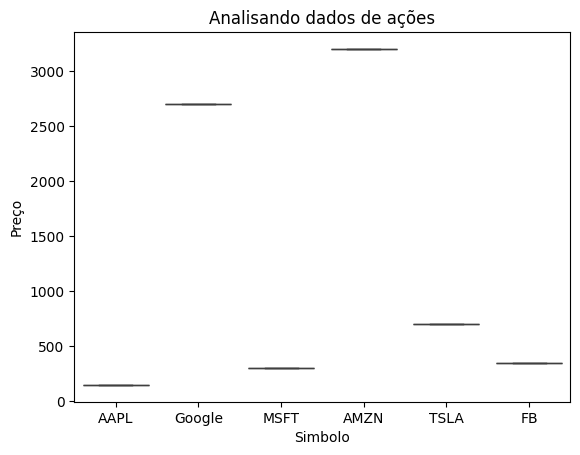

In [14]:
#Plotando o Boxplot
sns.boxplot(x= dados['Simbolo'],y=dados['Preço'])
plt.title('Analisando dados de ações')